In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from tensorflow import keras
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<Axes: >

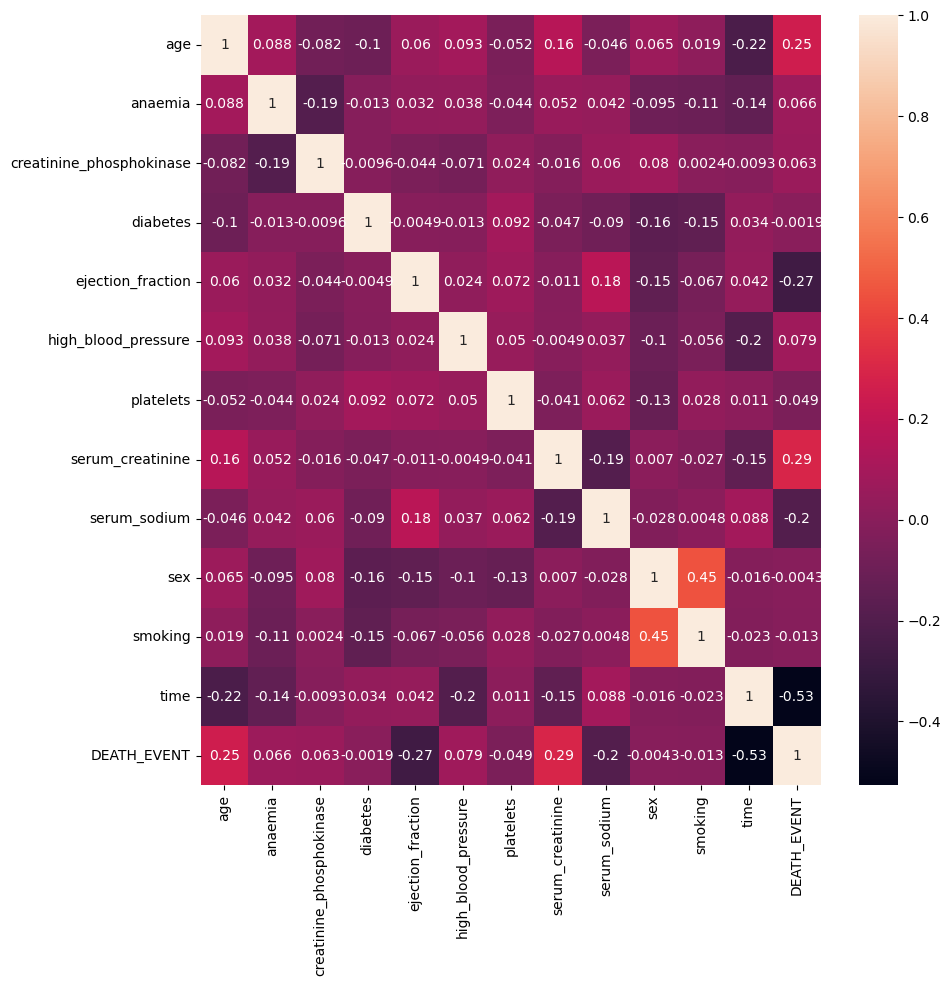

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

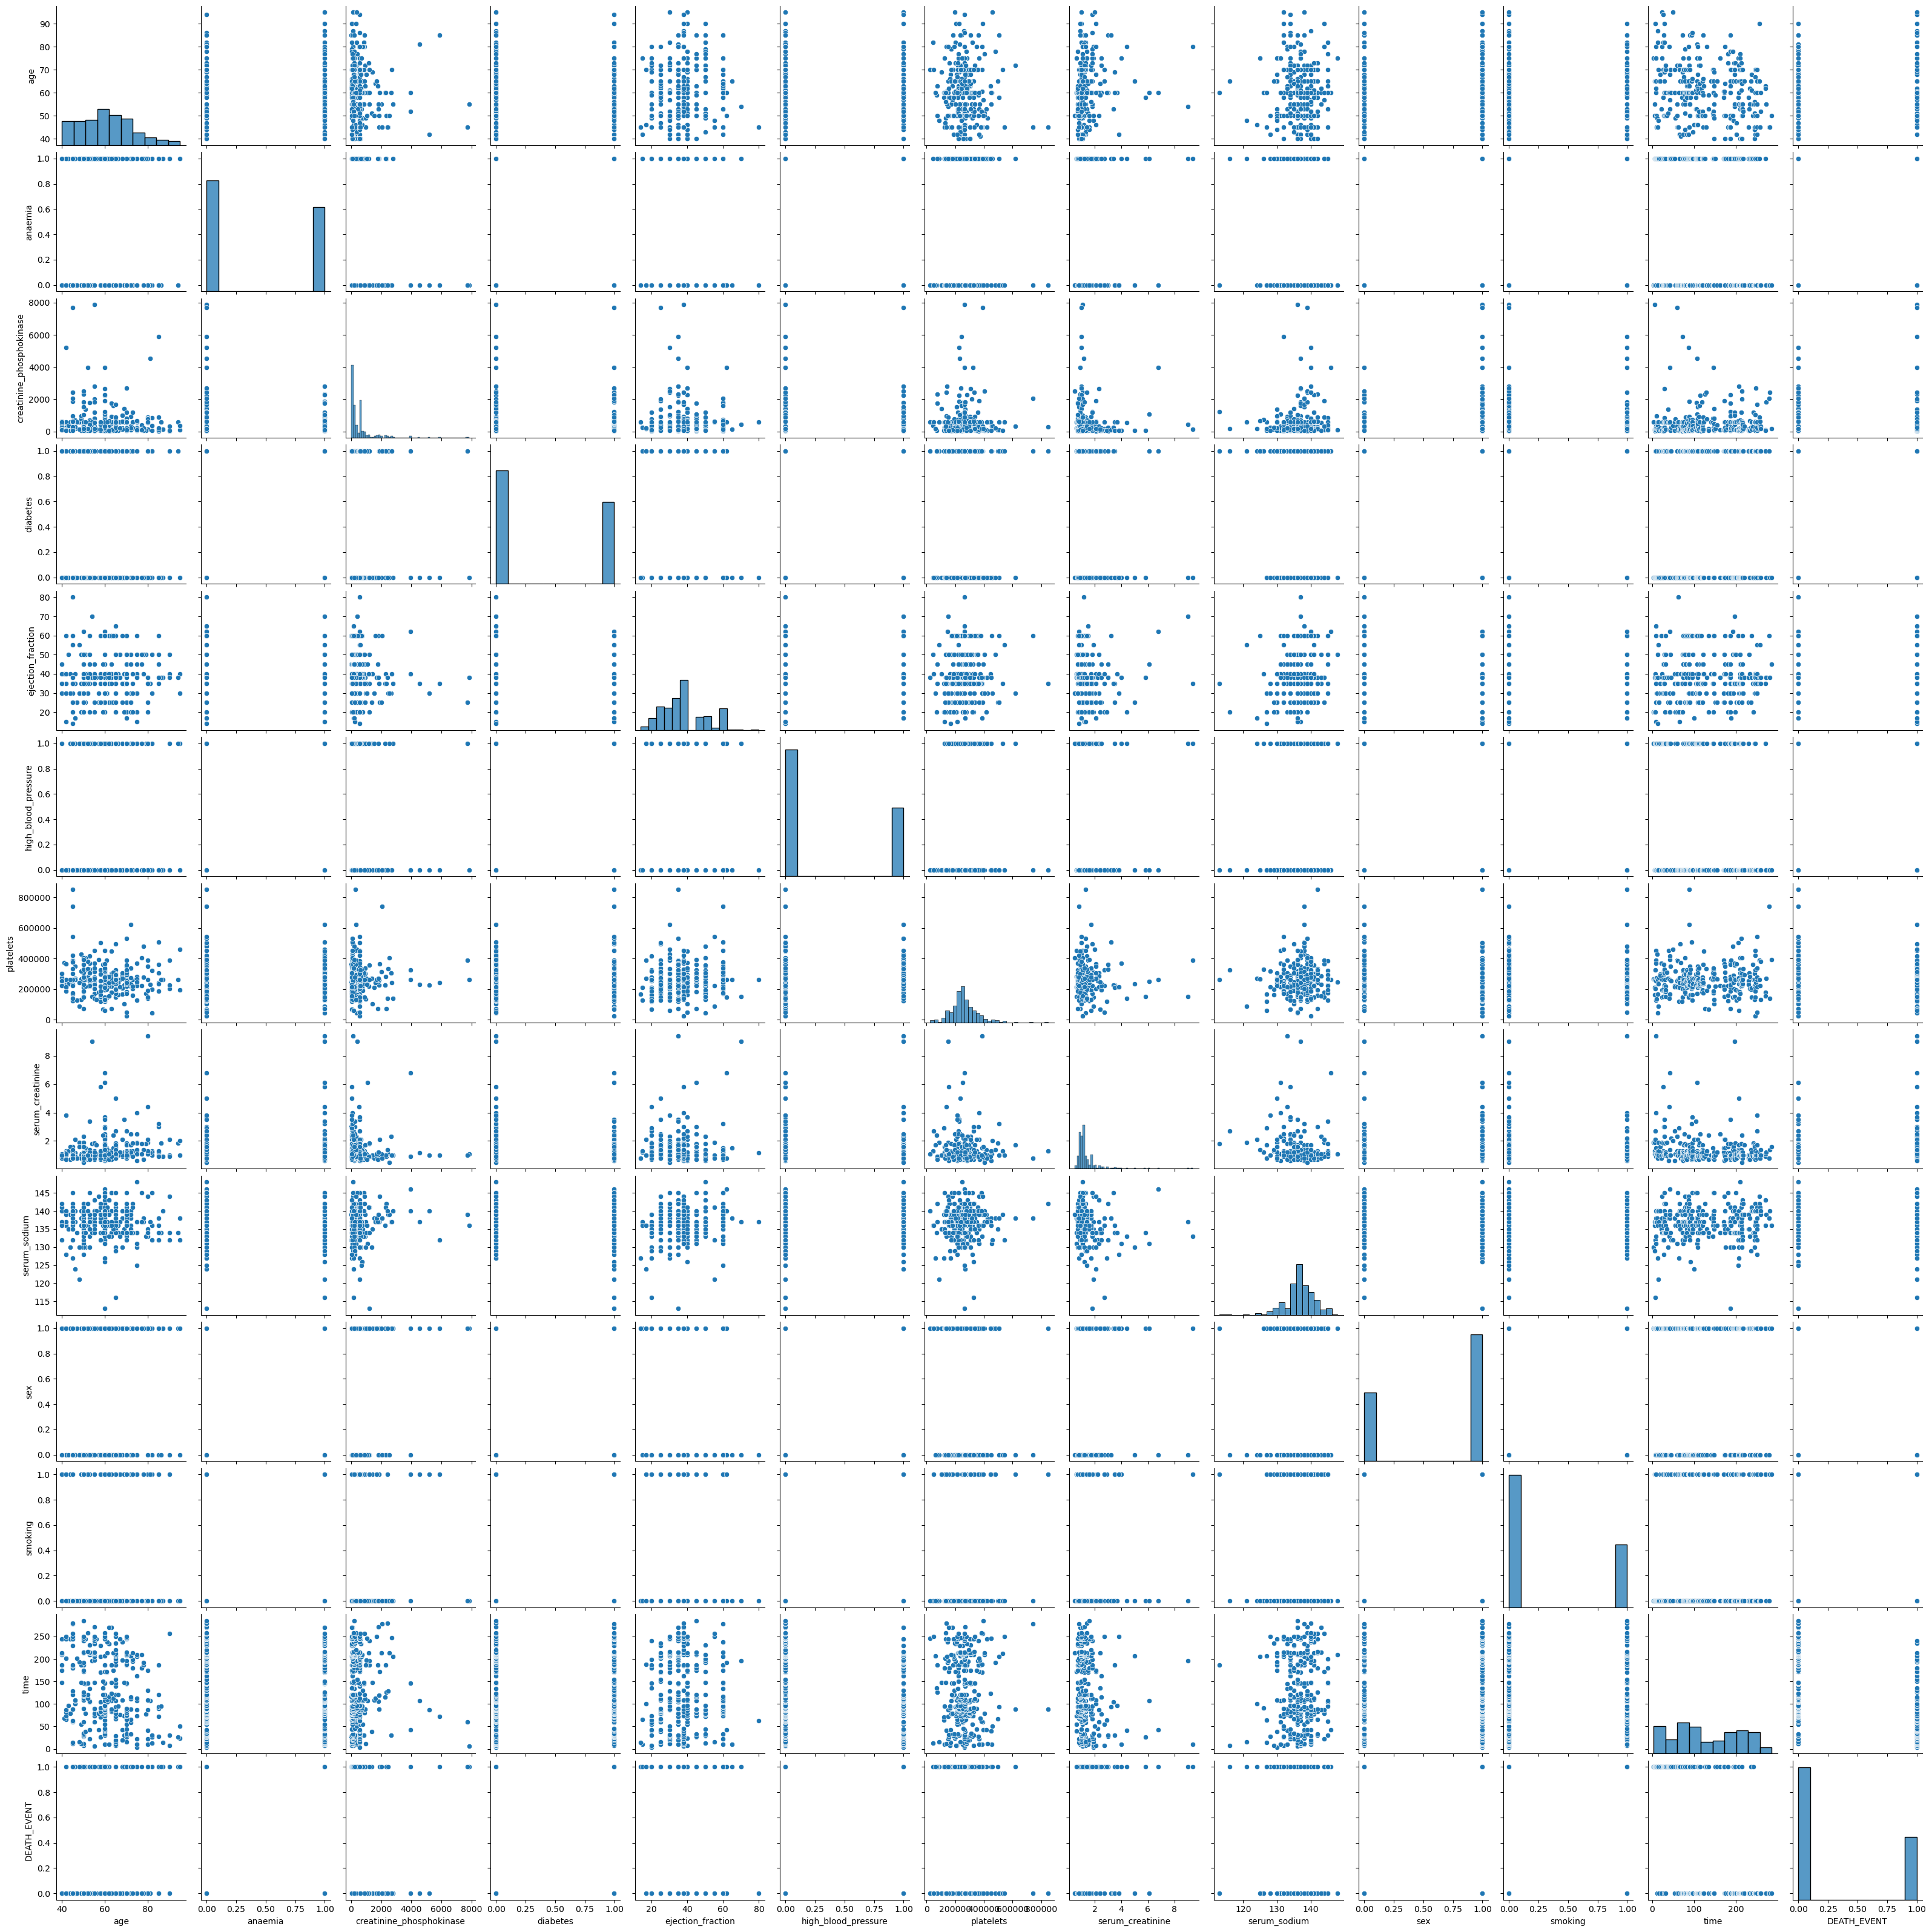

In [9]:
sns.pairplot(df)

Text(0, 0.5, 'ejection_fraction')

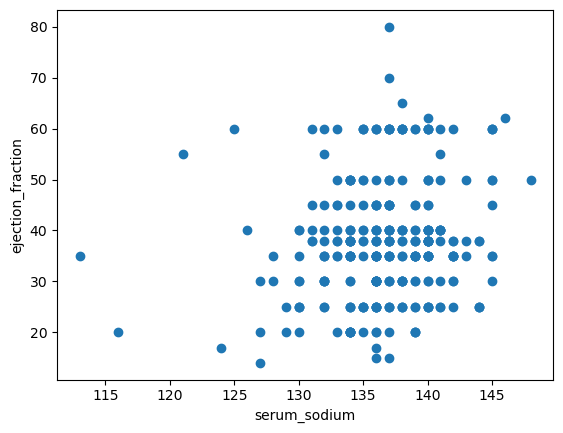

In [10]:
plt.scatter(x=df["serum_sodium"],y=df["ejection_fraction"])
plt.xlabel("serum_sodium")
plt.ylabel("ejection_fraction")

In [11]:
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [12]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
X=df.drop("DEATH_EVENT",axis=1)
y=df["DEATH_EVENT"]

In [33]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaled=StandardScaler()
X_scaled=s_scaled.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)


### 1.SVM Model

In [48]:
model=SVC()
model.fit(X_train,y_train)

SVC()

In [49]:
y_pred=model.predict(X_test)

In [50]:
print(f"Accuracy score_train:{accuracy_score(y_train,model.predict(X_train))}")
print(f"Accuracy score_test:{accuracy_score(y_pred,y_test)}")
print(f"confusion_matrix :\n{confusion_matrix(y_pred,y_test)}")
print(f"classification_report:\n{classification_report(y_pred,y_test)}")

Accuracy score_train:0.92
Accuracy score_test:0.7676767676767676
confusion_matrix :
[[53 19]
 [ 4 23]]
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        72
           1       0.55      0.85      0.67        27

    accuracy                           0.77        99
   macro avg       0.74      0.79      0.74        99
weighted avg       0.83      0.77      0.78        99



it is the case of overfitting

### 2.ANN Model

In [88]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5898 - loss: 0.6929 - val_accuracy: 0.8000 - val_loss: 0.6913
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7162 - loss: 0.6918 - val_accuracy: 0.8000 - val_loss: 0.6894
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7418 - loss: 0.6905 - val_accuracy: 0.8000 - val_loss: 0.6875
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7036 - loss: 0.6898 - val_accuracy: 0.8000 - val_loss: 0.6856
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7288 - loss: 0.6884 - val_accuracy: 0.8000 - val_loss: 0.6837
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7709 - loss: 0.6861 - val_accuracy: 0.8000 - val_loss: 0.6817
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7236 - loss: 0.6863 - val_accuracy: 0.8000 - val_loss: 0.6798
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7214 - loss: 0.6851 - val_accuracy: 0.8000 - val_loss

Epoch 52/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8273 - loss: 0.4151 - val_accuracy: 0.8500 - val_loss: 0.3678
Epoch 53/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8224 - loss: 0.4160 - val_accuracy: 0.8500 - val_loss: 0.3738
Epoch 54/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8002 - loss: 0.4168 - val_accuracy: 0.8500 - val_loss: 0.3764
Epoch 55/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8181 - loss: 0.4067 - val_accuracy: 0.8500 - val_loss: 0.3808
Epoch 56/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8538 - loss: 0.4340 - val_accuracy: 0.8500 - val_loss: 0.3847
Epoch 57/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7712 - loss: 0.4039 - val_accuracy: 0.8500 - val_loss: 0.3871
Epoch 58/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8294 - loss: 0.4266 - val_accuracy: 0.8500 - val_loss: 0.3897
Epoch 59/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8076 - loss: 0.4321 - val_accuracy: 0.8500 - v

In [95]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 82.79%


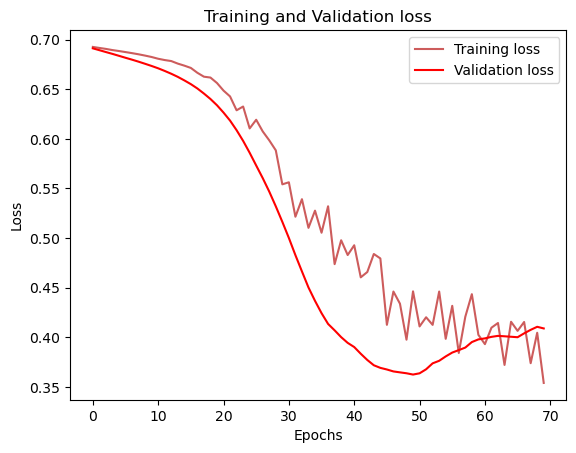

In [90]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

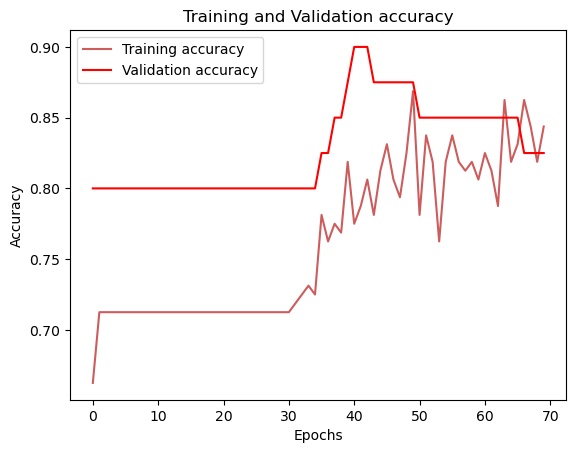

In [91]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.4

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [93]:
print(f"Accuracy score_train:{accuracy_score(y_train,model.predict(X_train)>0.4)}")
print(f"Accuracy score_test:{accuracy_score(y_pred,y_test)}")
print(f"confusion_matrix :\n{confusion_matrix(y_pred,y_test)}")
print(f"classification_report:\n{ classification_report(y_pred,y_test)}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy score_train:0.855
Accuracy score_test:0.8181818181818182
confusion_matrix :
[[50 11]
 [ 7 31]]
classification_report:
              precision    recall  f1-score   support

       False       0.88      0.82      0.85        61
        True       0.74      0.82      0.78        38

    accuracy                           0.82        99
   macro avg       0.81      0.82      0.81        99
weighted avg       0.82      0.82      0.82        99

